# Data Dictionary for E-commerce Dataset

This document provides an overview of the datasets and their columns used for analyzing the e-commerce marketplace.

---

## 1. **Customers Dataset (`olist_customers_dataset.csv`)**
| Column Name                | Description                                     |
|----------------------------|-------------------------------------------------|
| `customer_id`              | Key to the orders dataset. Each order has a unique `customer_id`. |
| `customer_unique_id`       | Unique identifier of a customer.               |
| `customer_zip_code_prefix` | First five digits of the customer zip code.     |
| `customer_city`            | Customer city name.                            |
| `customer_state`           | Customer state.                                |

---

## 2. **Geolocation Dataset (`olist_geolocation_dataset.csv`)**
| Column Name                | Description                                     |
|----------------------------|-------------------------------------------------|
| `geolocation_zip_code_prefix` | First 5 digits of the zip code.              |
| `geolocation_lat`          | Latitude of the location.                      |
| `geolocation_lng`          | Longitude of the location.                     |
| `geolocation_city`         | City name.                                     |
| `geolocation_state`        | State name.                                    |

---

## 3. **Order Items Dataset (`olist_order_items_dataset.csv`)**
| Column Name                | Description                                     |
|----------------------------|-------------------------------------------------|
| `order_id`                 | Order unique identifier.                       |
| `product_id`               | Product unique identifier.                     |
| `seller_id`                | Seller unique identifier.                      |
| `shipping_limit_date`      | Deadline for the seller to hand over the order to the logistics partner. |
| `price`                    | Price of the item.                             |
| `freight_value`            | Freight value for the item. For multi-item orders, the freight value is split among items. |

---

## 4. **Order Payments Dataset (`olist_order_payments_dataset.csv`)**
| Column Name                | Description                                     |
|----------------------------|-------------------------------------------------|
| `order_id`                 | Unique identifier for the order.               |
| `payment_sequential`       | Sequence number for multiple payments on an order. |
| `payment_type`             | Payment method chosen by the customer.         |
| `payment_installments`     | Number of installments chosen for payment.      |
| `payment_value`            | Transaction value of the payment.              |

---

## 5. **Order Reviews Dataset (`olist_order_reviews_dataset.csv`)**
| Column Name                | Description                                     |
|----------------------------|-------------------------------------------------|
| `review_id`                | Unique review identifier.                      |
| `order_id`                 | Unique order identifier.                       |
| `review_score`             | Customer satisfaction score (1 to 5).          |

---

## 6. **Orders Dataset (`olist_orders_dataset.csv`)**
| Column Name                | Description                                     |
|----------------------------|-------------------------------------------------|
| `order_id`                 | Unique identifier of the order.                |
| `customer_id`              | Key to the customer dataset.                   |
| `order_status`             | Status of the order (delivered, shipped, etc.). |
| `order_purchase_timestamp` | Purchase timestamp.                            |
| `order_approved_at`        | Payment approval timestamp.                    |
| `order_delivered_carrier_date` | Timestamp when the order was handed over to the logistics partner. |
| `order_delivered_customer_date` | Actual delivery date of the order to the customer. |
| `order_estimated_delivery_date` | Estimated delivery date given to the customer at the time of purchase. |

---

## 7. **Products Dataset (`olist_products_dataset.csv`)**
| Column Name                | Description                                     |
|----------------------------|-------------------------------------------------|
| `product_id`               | Unique product identifier.                     |
| `product_category_name`    | Product's root category in Portuguese.         |
| `product_name_lenght`      | Number of characters in the product name.       |
| `product_description_lenght` | Number of characters in the product description. |
| `product_photos_qty`       | Number of product photos published.            |
| `product_weight_g`         | Product weight (in grams).                     |
| `product_length_cm`        | Product length (in centimeters).               |
| `product_height_cm`        | Product height (in centimeters).               |
| `product_width_cm`         | Product width (in centimeters).                |

---

## 8. **Sellers Dataset (`olist_sellers_dataset.csv`)**
| Column Name                | Description                                     |
|----------------------------|-------------------------------------------------|
| `seller_id`                | Unique identifier for the seller.              |
| `seller_zip_code_prefix`   | First 5 digits of the seller zip code.          |
| `seller_city`              | Seller city name.                              |
| `seller_state`             | Seller state.                                  |

---

## 9. **Product Category Translation Dataset (`product_category_name_translation.csv`)**
| Column Name                | Description                                     |
|----------------------------|-------------------------------------------------|
| `product_category_name`    | Product category name in Portuguese.           |
| `product_category_name_english` | Product category name in English.          |

---

### **How to Use:**
This data dictionary can help you understand the dataset's structure and column relationships, which is essential for analysis and merging operations.


# Relationships Between Tables

| **Table 1**        | **Table 2**        | **Key(s)**                       | **Relationship Description**                                                                   |
|---------------------|--------------------|-----------------------------------|-----------------------------------------------------------------------------------------------|
| Customers           | Orders             | `customer_id`                    | Links customer details to their respective orders.                                            |
| Orders              | Order Items        | `order_id`                       | Associates orders with the items purchased in each order.                                     |
| Orders              | Order Payments     | `order_id`                       | Maps payments to the corresponding orders.                                                    |
| Orders              | Order Reviews      | `order_id`                       | Connects reviews to the specific orders being reviewed.                                       |
| Order Items         | Products           | `product_id`                     | Identifies which products are included in each order item.                                    |
| Order Items         | Sellers            | `seller_id`                      | Links items in orders to the sellers providing those items.                                   |
| Customers           | Geolocation        | `geolocation_zip_code_prefix`    | Matches customers to their geographical location using the zip code prefix.                  |
| Products            | Product Categories | `product_category_name`          | Maps products to their respective categories for better classification and understanding.     |


LOADING AND MERGING DATASETS

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
olist_order_items=pd.read_csv(".\dataset\olist_order_items_dataset.csv")
olist_products=pd.read_csv(".\dataset\olist_products_dataset.csv")

<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
C:\Users\aafre\AppData\Local\Temp\ipykernel_13488\2585657775.py:8: SyntaxWarning: invalid escape sequence '\d'
  olist_order_items=pd.read_csv(".\dataset\olist_order_items_dataset.csv")
C:\Users\aafre\AppData\Local\Temp\ipykernel_13488\2585657775.py:9: SyntaxWarning: invalid escape sequence '\d'
  olist_products=pd.read_csv(".\dataset\olist_products_dataset.csv")


In [2]:
merged=pd.merge(
    olist_order_items,olist_products,on='product_id',how='left')

In [3]:
merged.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [4]:
product_translation=pd.read_csv(".\dataset\product_category_name_translation.csv")
product_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [5]:
product_translation.shape

(71, 2)

In [6]:
merged=pd.merge(merged,product_translation,left_on='product_category_name',right_on='product_category_name',how='left')

In [7]:
olist_orders=pd.read_csv(".\dataset\olist_orders_dataset.csv")
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
merged=pd.merge(merged,olist_orders,on='order_id',how='left')

In [9]:
merged.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_height_cm,product_width_cm,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,...,15.0,40.0,housewares,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,...,26.0,38.0,computers_accessories,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,...,24.0,19.0,sports_leisure,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,...,20.0,20.0,computers_accessories,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79,cama_mesa_banho,47.0,511.0,...,3.0,19.0,bed_bath_table,96d649da0cc4ff33bb408b199d4c7dcf,delivered,2018-06-09 17:00:18,2018-06-09 17:10:13,2018-06-11 14:11:00,2018-06-14 17:56:26,2018-06-28 00:00:00


In [10]:
olist_reviews=pd.read_csv(".\dataset\olist_order_reviews_dataset.csv")
olist_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [11]:
olist_reviews.drop(['review_comment_title','review_comment_message'], axis=1, inplace=True)
olist_reviews.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53


In [12]:
merged=pd.merge(merged,olist_reviews,on='order_id',how='left')

In [13]:
olist_payments=pd.read_csv(".\dataset\olist_order_payments_dataset.csv")
olist_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [14]:
merged=pd.merge(merged,olist_payments,on='order_id',how='left')
merged.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,2017-09-20 23:43:48,2017-09-29 00:00:00,97ca439bc427b48bc1cd7177abe71365,5.0,2017-09-21 00:00:00,2017-09-22 10:57:03,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,2017-05-12 16:04:24,2017-05-15 00:00:00,7b07bacd811c4117b742569b04ce3580,4.0,2017-05-13 00:00:00,2017-05-15 11:34:13,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,2018-01-22 13:19:16,2018-02-05 00:00:00,0c5b33dea94867d1ac402749e5438e8b,5.0,2018-01-23 00:00:00,2018-01-23 16:06:31,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,2018-08-14 13:32:39,2018-08-20 00:00:00,f4028d019cb58564807486a6aaf33817,4.0,2018-08-15 00:00:00,2018-08-15 16:39:01,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,2017-03-01 16:42:31,2017-03-17 00:00:00,940144190dcba6351888cafa43f3a3a5,5.0,2017-03-02 00:00:00,2017-03-03 10:54:59,1.0,credit_card,3.0,218.04


In [15]:
olist_customer=pd.read_csv(".\dataset\olist_customers_dataset.csv")
olist_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [16]:
merged=pd.merge(merged,olist_customer,on='customer_id',how='left')
merged.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,2017-09-21 00:00:00,2017-09-22 10:57:03,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,2017-05-13 00:00:00,2017-05-15 11:34:13,1.0,credit_card,3.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,2018-01-23 00:00:00,2018-01-23 16:06:31,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,2018-08-15 00:00:00,2018-08-15 16:39:01,1.0,credit_card,2.0,25.78,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,2017-03-02 00:00:00,2017-03-03 10:54:59,1.0,credit_card,3.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [17]:
olist_sellers=pd.read_csv(".\dataset\olist_sellers_dataset.csv")
olist_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [18]:
merged=pd.merge(merged,olist_sellers,on='seller_id',how='left')
merged.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,credit_card,3.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,credit_card,2.0,25.78,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,credit_card,3.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,87900,loanda,PR


In [19]:
merged.shape

(118310, 38)

In [20]:
merged.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')

In [21]:
olist_geo=pd.read_csv(".\dataset\olist_geolocation_dataset.csv")
olist_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [22]:
olist_geo.drop(['geolocation_lat','geolocation_lng'],axis=1,inplace=True)
olist_geo.head()

,geolocation_zip_code_prefix,geolocation_city,geolocation_state
0,1037,sao paulo,SP
1,1046,sao paulo,SP
2,1046,sao paulo,SP
3,1041,sao paulo,SP
4,1035,sao paulo,SP


In [23]:
olist_geo.shape

(1000163, 3)

HANDLING NULL AND DUPLICATES VALUES

In [24]:
# checking for duplicate values
olist_geo.duplicated().value_counts()

True     972251
False     27912
Name: count, dtype: int64

In [25]:
# dropping all duplicate values
olist_geolocation=olist_geo.drop_duplicates()

In [26]:
olist_geolocation.duplicated().value_counts()

False    27912
Name: count, dtype: int64

In [27]:
olist_geolocation.head()

,geolocation_zip_code_prefix,geolocation_city,geolocation_state
0,1037,sao paulo,SP
1,1046,sao paulo,SP
3,1041,sao paulo,SP
4,1035,sao paulo,SP
5,1012,são paulo,SP


In [28]:
olist_geolocation=olist_geolocation.rename(columns={'geolocation_zip_code_prefix':'customer_zip_code_prefix'})
olist_geolocation.head()

,customer_zip_code_prefix,geolocation_city,geolocation_state
0,1037,sao paulo,SP
1,1046,sao paulo,SP
3,1041,sao paulo,SP
4,1035,sao paulo,SP
5,1012,são paulo,SP


In [29]:
merged=pd.merge(merged,olist_geolocation,on='customer_zip_code_prefix',how='left')
merged.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,56.0,239.0,...,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP,santa fe do sul,SP
2,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,56.0,239.0,...,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP,santa fé do sul,SP
3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,moveis_decoracao,59.0,695.0,...,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG,pará de minas,MG
4,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,moveis_decoracao,59.0,695.0,...,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG,para de minas,MG


In [30]:
merged.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'geolocation_city', 'geolocation_state'],
      dtype='object')

In [31]:
print(merged.isnull().sum().sort_values(ascending=False))

order_delivered_customer_date    3856
product_category_name_english    2615
product_category_name            2579
product_photos_qty               2579
product_name_lenght              2579
product_description_lenght       2579
order_delivered_carrier_date     1919
review_id                        1469
review_creation_date             1469
review_answer_timestamp          1469
review_score                     1469
geolocation_city                  317
geolocation_state                 317
product_width_cm                   26
product_length_cm                  26
product_height_cm                  26
product_weight_g                   26
order_approved_at                  24
payment_type                        6
payment_installments                6
payment_value                       6
payment_sequential                  6
order_id                            0
product_id                          0
freight_value                       0
price                               0
shipping_lim

In [32]:
merged1=merged.copy()
merged1.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,56.0,239.0,...,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP,santa fe do sul,SP
2,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,56.0,239.0,...,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP,santa fé do sul,SP
3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,moveis_decoracao,59.0,695.0,...,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG,pará de minas,MG
4,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,moveis_decoracao,59.0,695.0,...,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG,para de minas,MG


In [33]:
merged=merged.dropna()
merged

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP,santa fe do sul,SP
2,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP,santa fé do sul,SP
3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG,pará de minas,MG
4,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG,para de minas,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177470,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,...,386.53,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,1206,sao paulo,SP,curitiba,PR
177471,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,...,116.85,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,80610,curitiba,PR,sao paulo,SP
177472,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,...,116.85,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,80610,curitiba,PR,são paulo,SP
177473,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,...,64.71,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,4733,sao paulo,SP,vinhedo,SP


In [34]:
# final merged dataset
merged1.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'geolocation_city', 'geolocation_state'],
      dtype='object')

In [35]:
# Check for missing values
missing_values = merged1.isnull().sum()
missing_percent = (missing_values / len(merged1)) * 100

# Create a DataFrame for better visualization
missing_df = pd.DataFrame({
    'Column': merged1.columns,
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
}).reset_index(drop=True)

print(missing_df.sort_values(by='Missing Percentage', ascending=False))


                           Column  Missing Count  Missing Percentage
21  order_delivered_customer_date           3856            2.172700
15  product_category_name_english           2615            1.473447
7           product_category_name           2579            1.453162
10             product_photos_qty           2579            1.453162
8             product_name_lenght           2579            1.453162
9      product_description_lenght           2579            1.453162
20   order_delivered_carrier_date           1919            1.081279
23                      review_id           1469            0.827722
25           review_creation_date           1469            0.827722
26        review_answer_timestamp           1469            0.827722
24                   review_score           1469            0.827722
38               geolocation_city            317            0.178617
39              geolocation_state            317            0.178617
14               product_width_cm 

In [36]:
merged1.to_csv('ecommerce_dataset.csv',index=False)

In [37]:
 # Check for duplicates
print(merged1.isnull().sum().sort_values(ascending=False))                                                                         

order_delivered_customer_date    3856
product_category_name_english    2615
product_category_name            2579
product_photos_qty               2579
product_name_lenght              2579
product_description_lenght       2579
order_delivered_carrier_date     1919
review_id                        1469
review_creation_date             1469
review_answer_timestamp          1469
review_score                     1469
geolocation_city                  317
geolocation_state                 317
product_width_cm                   26
product_length_cm                  26
product_height_cm                  26
product_weight_g                   26
order_approved_at                  24
payment_type                        6
payment_installments                6
payment_value                       6
payment_sequential                  6
order_id                            0
product_id                          0
freight_value                       0
price                               0
shipping_lim

In [38]:
merged1.dropna()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP,santa fe do sul,SP
2,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP,santa fé do sul,SP
3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG,pará de minas,MG
4,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,216.87,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG,para de minas,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177470,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,...,386.53,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,1206,sao paulo,SP,curitiba,PR
177471,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,...,116.85,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,80610,curitiba,PR,sao paulo,SP
177472,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,...,116.85,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,80610,curitiba,PR,são paulo,SP
177473,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,...,64.71,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,4733,sao paulo,SP,vinhedo,SP


In [39]:
duplicate_count = merged1.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [40]:
# Drop duplicates if any
merged1 = merged1.drop_duplicates()
print("Duplicates removed!")                                                                                                                     # Convert IDs to strings
id_columns = ['order_id', 'customer_id', 'product_id', 'seller_id']
for col in id_columns:
    merged1[col] = merged1[col].astype(str)

Duplicates removed!


In [41]:
# Convert time-based columns to datetime
date_columns = ['order_purchase_timestamp', 'order_approved_at', 
                'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_columns:
    merged1[col] = pd.to_datetime(merged1[col])


In [42]:
print(merged1.dtypes); numerical_cols = ['price', 'freight_value', 'product_weight_g', 
                                        'product_length_cm', 'product_height_cm', 
                                        'product_width_cm', 'payment_value']


order_id                                 object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
product_category_name                    object
product_name_lenght                     float64
product_description_lenght              float64
product_photos_qty                      float64
product_weight_g                        float64
product_length_cm                       float64
product_height_cm                       float64
product_width_cm                        float64
product_category_name_english            object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date            

In [43]:
# Verify key columns
key_columns = ['order_id', 'customer_id', 'product_id', 'seller_id']
print("Missing values in key columns:")
print(merged1[key_columns].isnull().sum())                                                                  
geo_distribution = merged1.groupby('customer_state')['order_id'].count().reset_index()
geo_distribution = geo_distribution.rename(columns={'order_id': 'total_orders'})

 

Missing values in key columns:
order_id       0
customer_id    0
product_id     0
seller_id      0
dtype: int64


# INSIGHTS EXTRACTED FROM ANALYSIS

 GEOGRAPHIC DISTRIBUTION OF ORDERS

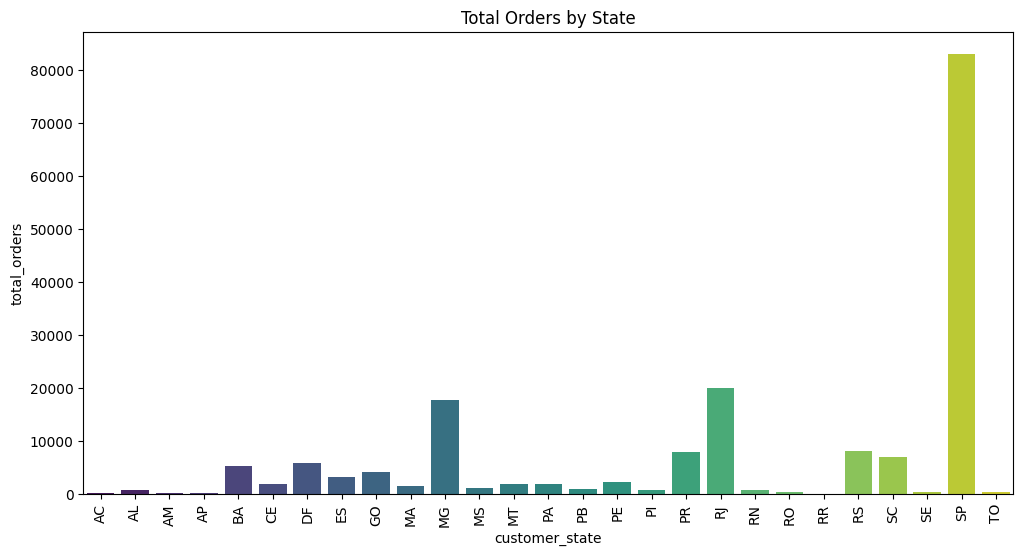

In [44]:
# Bar plot for geographic distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_state', y='total_orders', data=geo_distribution, palette='viridis')
plt.title("Total Orders by State")
plt.xticks(rotation=90)
plt.show()                                                                                                                                                   # Orders by month
merged1['order_month'] = merged1['order_purchase_timestamp'].dt.to_period('M')
monthly_orders = merged1.groupby('order_month')['order_id'].count().reset_index()


The states with the most orders are Sao Paulo, Rio de Janerio and Minas Gerais.

REVENUE TRENDS OVER TIME

Total Revenue Generated by Olist: 24725128.36


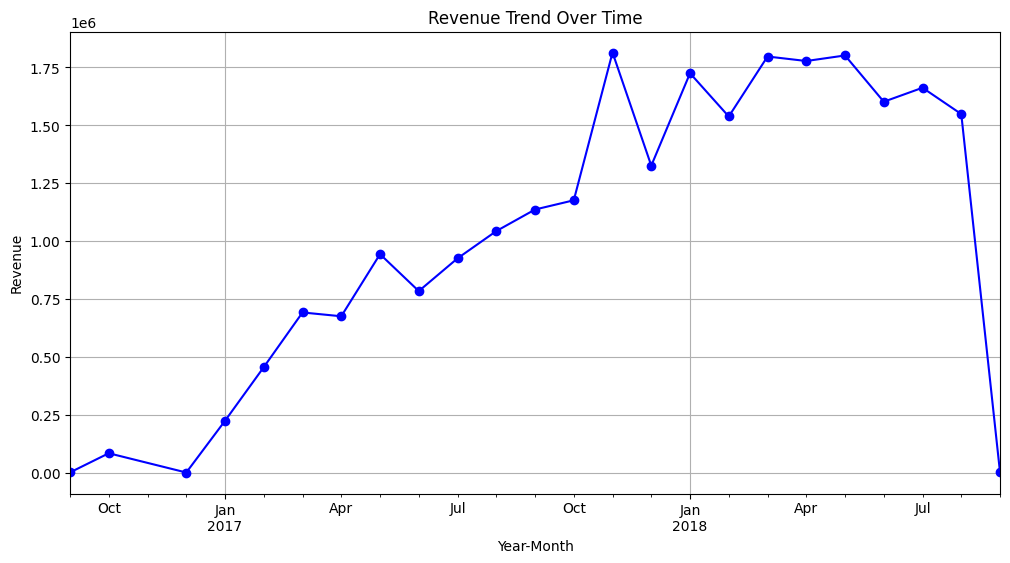

In [45]:
# Add revenue column (price + freight value)
merged1['revenue'] = merged1['price'] + merged1['freight_value']

# Calculate total revenue
total_revenue = merged1['revenue'].sum()
print(f"Total Revenue Generated by Olist: {total_revenue:.2f}")

# Revenue trend over time
merged1['order_purchase_timestamp'] = pd.to_datetime(merged1['order_purchase_timestamp'])
merged1['year_month'] = merged1['order_purchase_timestamp'].dt.to_period('M')

monthly_revenue = merged1.groupby('year_month')['revenue'].sum()

# Plot monthly revenue
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='b')
plt.title("Revenue Trend Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Revenue")
plt.grid()
plt.show()


The total revenue generated by the sale of the product is $1,078,000 approx.

NUMBER OF ORDERS OVER TIME


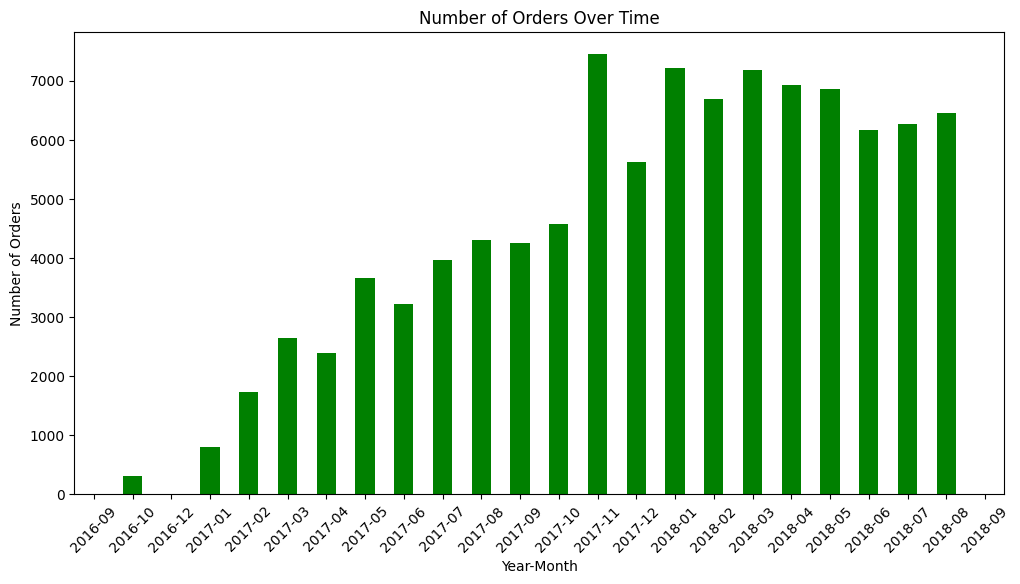

In [46]:
# Number of orders by month
monthly_orders = merged1.groupby('year_month')['order_id'].nunique()

# Plot monthly orders
plt.figure(figsize=(12, 6))
monthly_orders.plot(kind='bar', color='green')
plt.title("Number of Orders Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()


Monthly orders steadily increased over the analysed period, with the highest number of orders in November, 2011.

POPULAR PRODUCT CATEGORIES

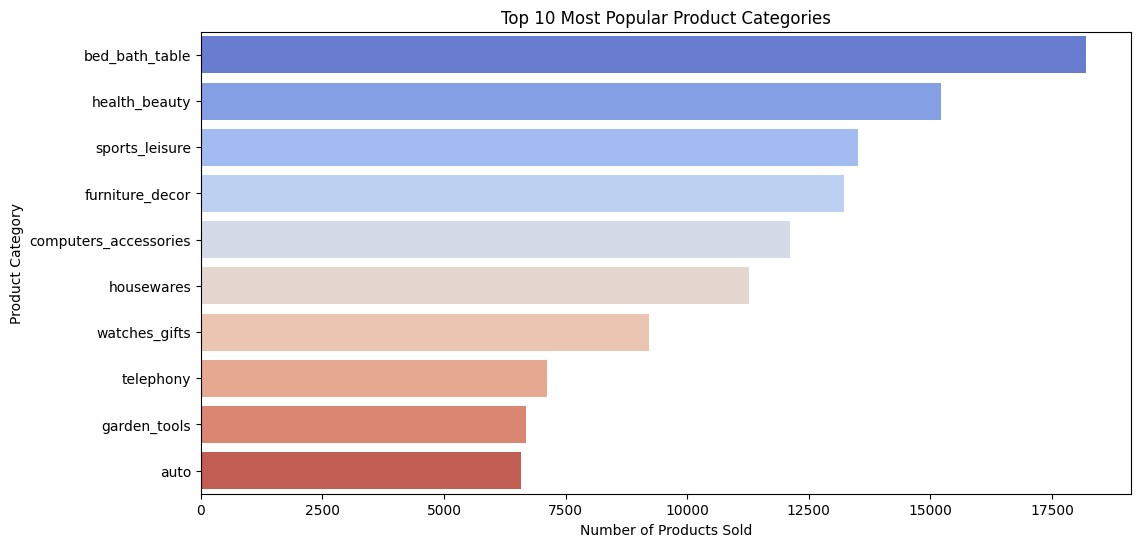

In [47]:
# Most popular product categories
popular_categories = merged1['product_category_name_english'].value_counts().head(10)

# Plot popular categories
plt.figure(figsize=(12, 6))
sns.barplot(x=popular_categories.values, y=popular_categories.index, palette='coolwarm')
plt.title("Top 10 Most Popular Product Categories")
plt.xlabel("Number of Products Sold")
plt.ylabel("Product Category")
plt.show()


The top five product categories in the terms of sales is : bed_bath_table,health_beauty,sports_leisure, furniture_decor, computers_accessories.

AVERAGE ORDER VALUE

Average Order Value (AOV): 250.59


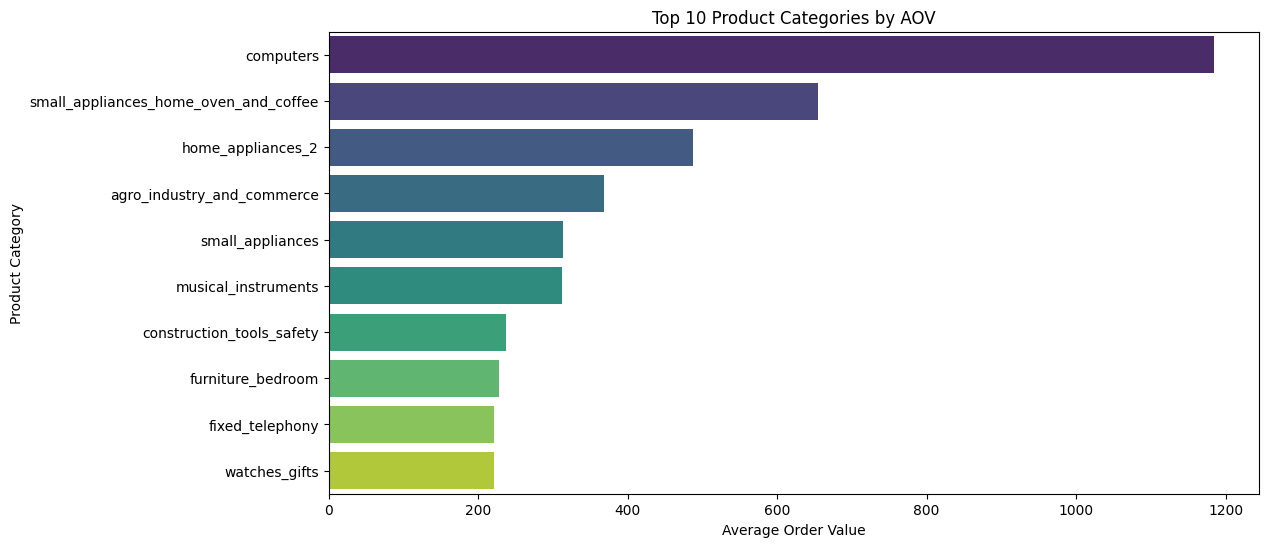

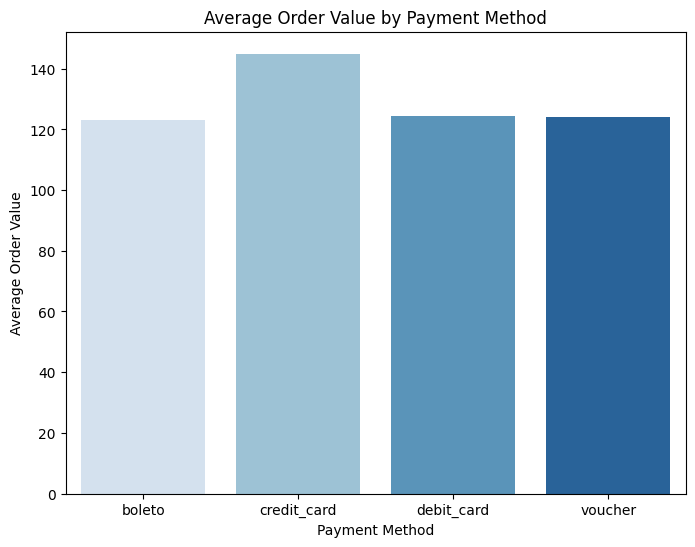

In [48]:
# Calculate AOV
AOV = merged1['revenue'].sum() / merged1['order_id'].nunique()
print(f"Average Order Value (AOV): {AOV:.2f}")

# AOV by product category
aov_category = merged1.groupby('product_category_name_english')['revenue'].mean().sort_values(ascending=False).head(10)

# Plot AOV by category
plt.figure(figsize=(12, 6))
sns.barplot(x=aov_category.values, y=aov_category.index, palette='viridis')
plt.title("Top 10 Product Categories by AOV")
plt.xlabel("Average Order Value")
plt.ylabel("Product Category")
plt.show()

# AOV by payment method
aov_payment = merged1.groupby('payment_type')['revenue'].mean()

# Plot AOV by payment method
plt.figure(figsize=(8, 6))
sns.barplot(x=aov_payment.index, y=aov_payment.values, palette='Blues')
plt.title("Average Order Value by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Average Order Value")
plt.show()


TOP 10 ACTIVE SELLERS BY SALES VOLUME

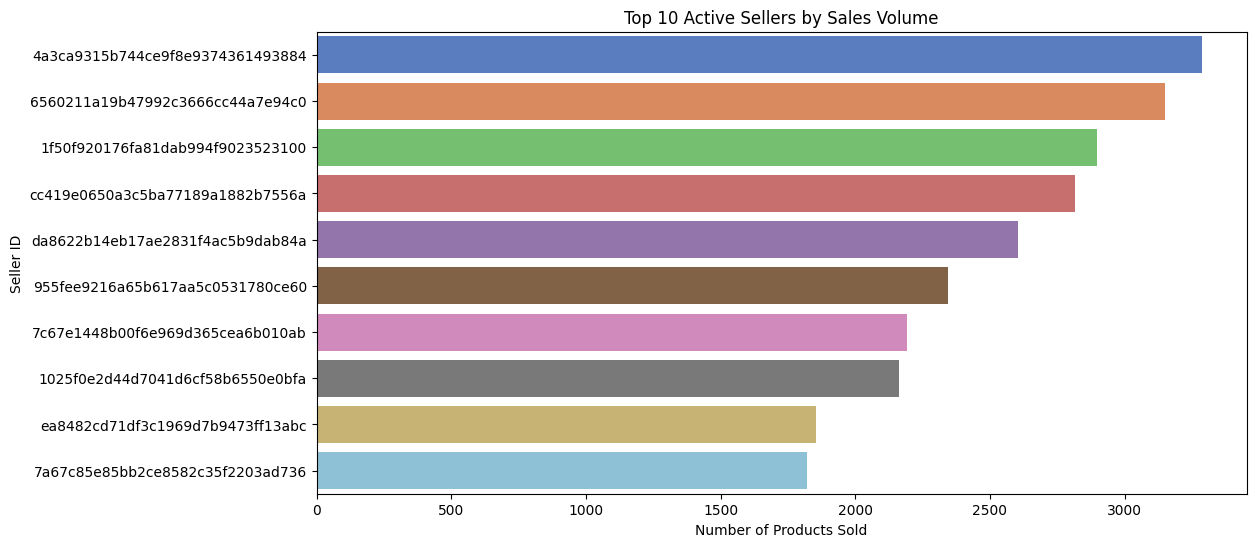

In [49]:
# Top 10 sellers by sales volume
top_sellers = merged1['seller_id'].value_counts().head(10)

# Plot top sellers
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sellers.values, y=top_sellers.index, palette='muted')
plt.title("Top 10 Active Sellers by Sales Volume")
plt.xlabel("Number of Products Sold")
plt.ylabel("Seller ID")
plt.show()


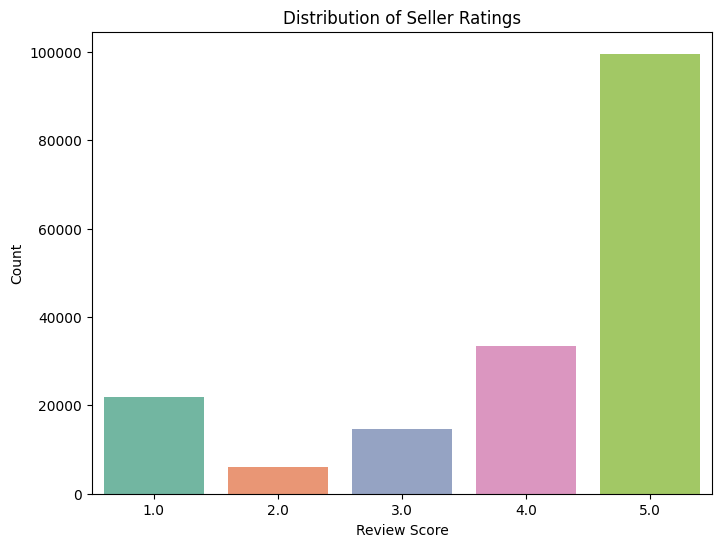

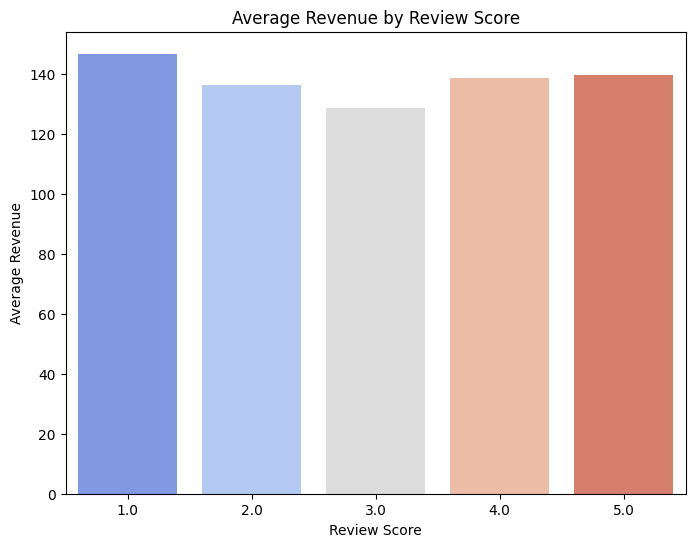

In [50]:
# Distribution of review scores
plt.figure(figsize=(8, 6))
sns.countplot(x='review_score', data=merged1, palette='Set2')
plt.title("Distribution of Seller Ratings")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.show()

# Average revenue by review score
rating_sales = merged1.groupby('review_score')['revenue'].mean()

# Plot impact of ratings on sales
plt.figure(figsize=(8, 6))
sns.barplot(x=rating_sales.index, y=rating_sales.values, palette='coolwarm')
plt.title("Average Revenue by Review Score")
plt.xlabel("Review Score")
plt.ylabel("Average Revenue")
plt.show()


MOST COMMON PAYMENT METHOD

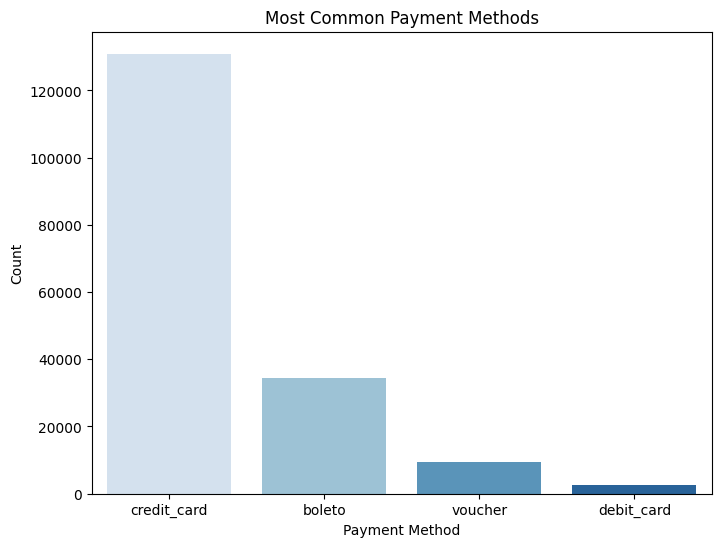

In [51]:
# Payment method counts
payment_counts = merged1['payment_type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='Blues')
plt.title("Most Common Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()


PEOPLE PREFER MAKING PAYMENT VIA CREDIT CARD THE MOST.

REVENUE GENERATED BY THE PRODUCT CATEGORY

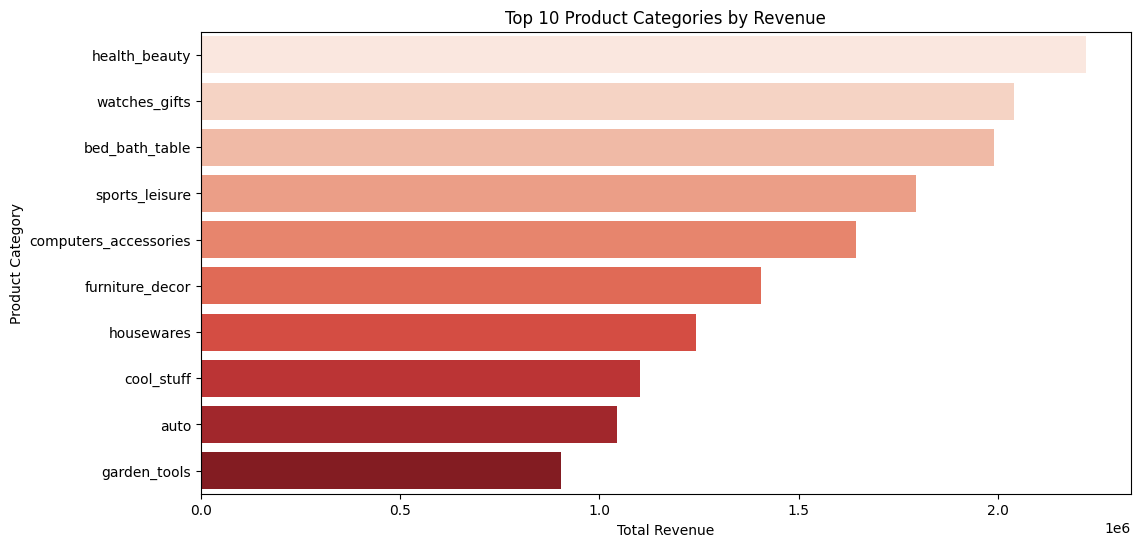

In [52]:
# Revenue by product category
category_revenue = merged1.groupby('product_category_name_english')['revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='Reds')
plt.title("Top 10 Product Categories by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Category")
plt.show()


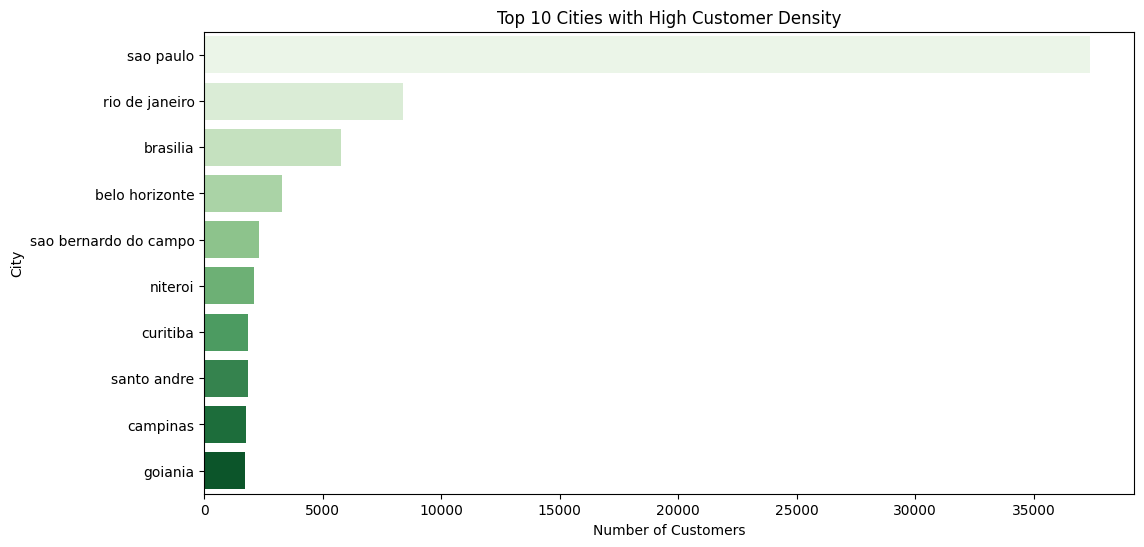

In [53]:
# Top 10 cities by customer count
customer_city_density = merged1['customer_city'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=customer_city_density.values, y=customer_city_density.index, palette='Greens')
plt.title("Top 10 Cities with High Customer Density")
plt.xlabel("Number of Customers")
plt.ylabel("City")
plt.show()


In [54]:
# Number of orders per customer
customer_orders = merged1.groupby('customer_unique_id')['order_id'].nunique()

# Repeat customers
repeat_customers = customer_orders[customer_orders > 1].count()

# Percentage of repeat customer sales
repeat_sales = merged1[merged1['customer_unique_id'].isin(customer_orders[customer_orders > 1].index)]['revenue'].sum()
total_sales = merged1['revenue'].sum()
repeat_sales_percentage = (repeat_sales / total_sales) * 100

print(f"Repeat Customers: {repeat_customers}")
print(f"Percentage of Total Sales from Repeat Customers: {repeat_sales_percentage:.2f}%")


Repeat Customers: 2913
Percentage of Total Sales from Repeat Customers: 6.16%


In [55]:
# Orders marked as 'canceled'
canceled_orders = merged1[merged1['order_status'] == 'canceled']

# Revenue lost due to cancellations
canceled_revenue = canceled_orders['revenue'].sum()
print(f"Total Revenue Lost Due to Cancellations: {canceled_revenue:.2f}")


Total Revenue Lost Due to Cancellations: 165231.39
